<a href="https://colab.research.google.com/github/xdomodomox/colab/blob/main/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Realstic Data


In [1]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/ANN_Timeseries_Forecast_python_demo/Data/Close.csv')
#data = pd.read_csv('/content/drive/MyDrive/RNN/BTC-USD.csv')
data.head()


,Date,Close,Lag_1,Lag_2,Lag_3
0,2010-01-07,550.000000,563.725464,556.862732,555.882324
1,2010-01-08,539.215698,550.000000,563.725464,556.862732
2,2010-01-11,547.058838,539.215698,550.000000,563.725464
3,2010-01-12,547.058838,547.058838,539.215698,550.000000
4,2010-01-13,536.274536,547.058838,547.058838,539.215698


In [4]:
# 提取 Close 數據
close_data = data['Close'].values.reshape(-1, 1)


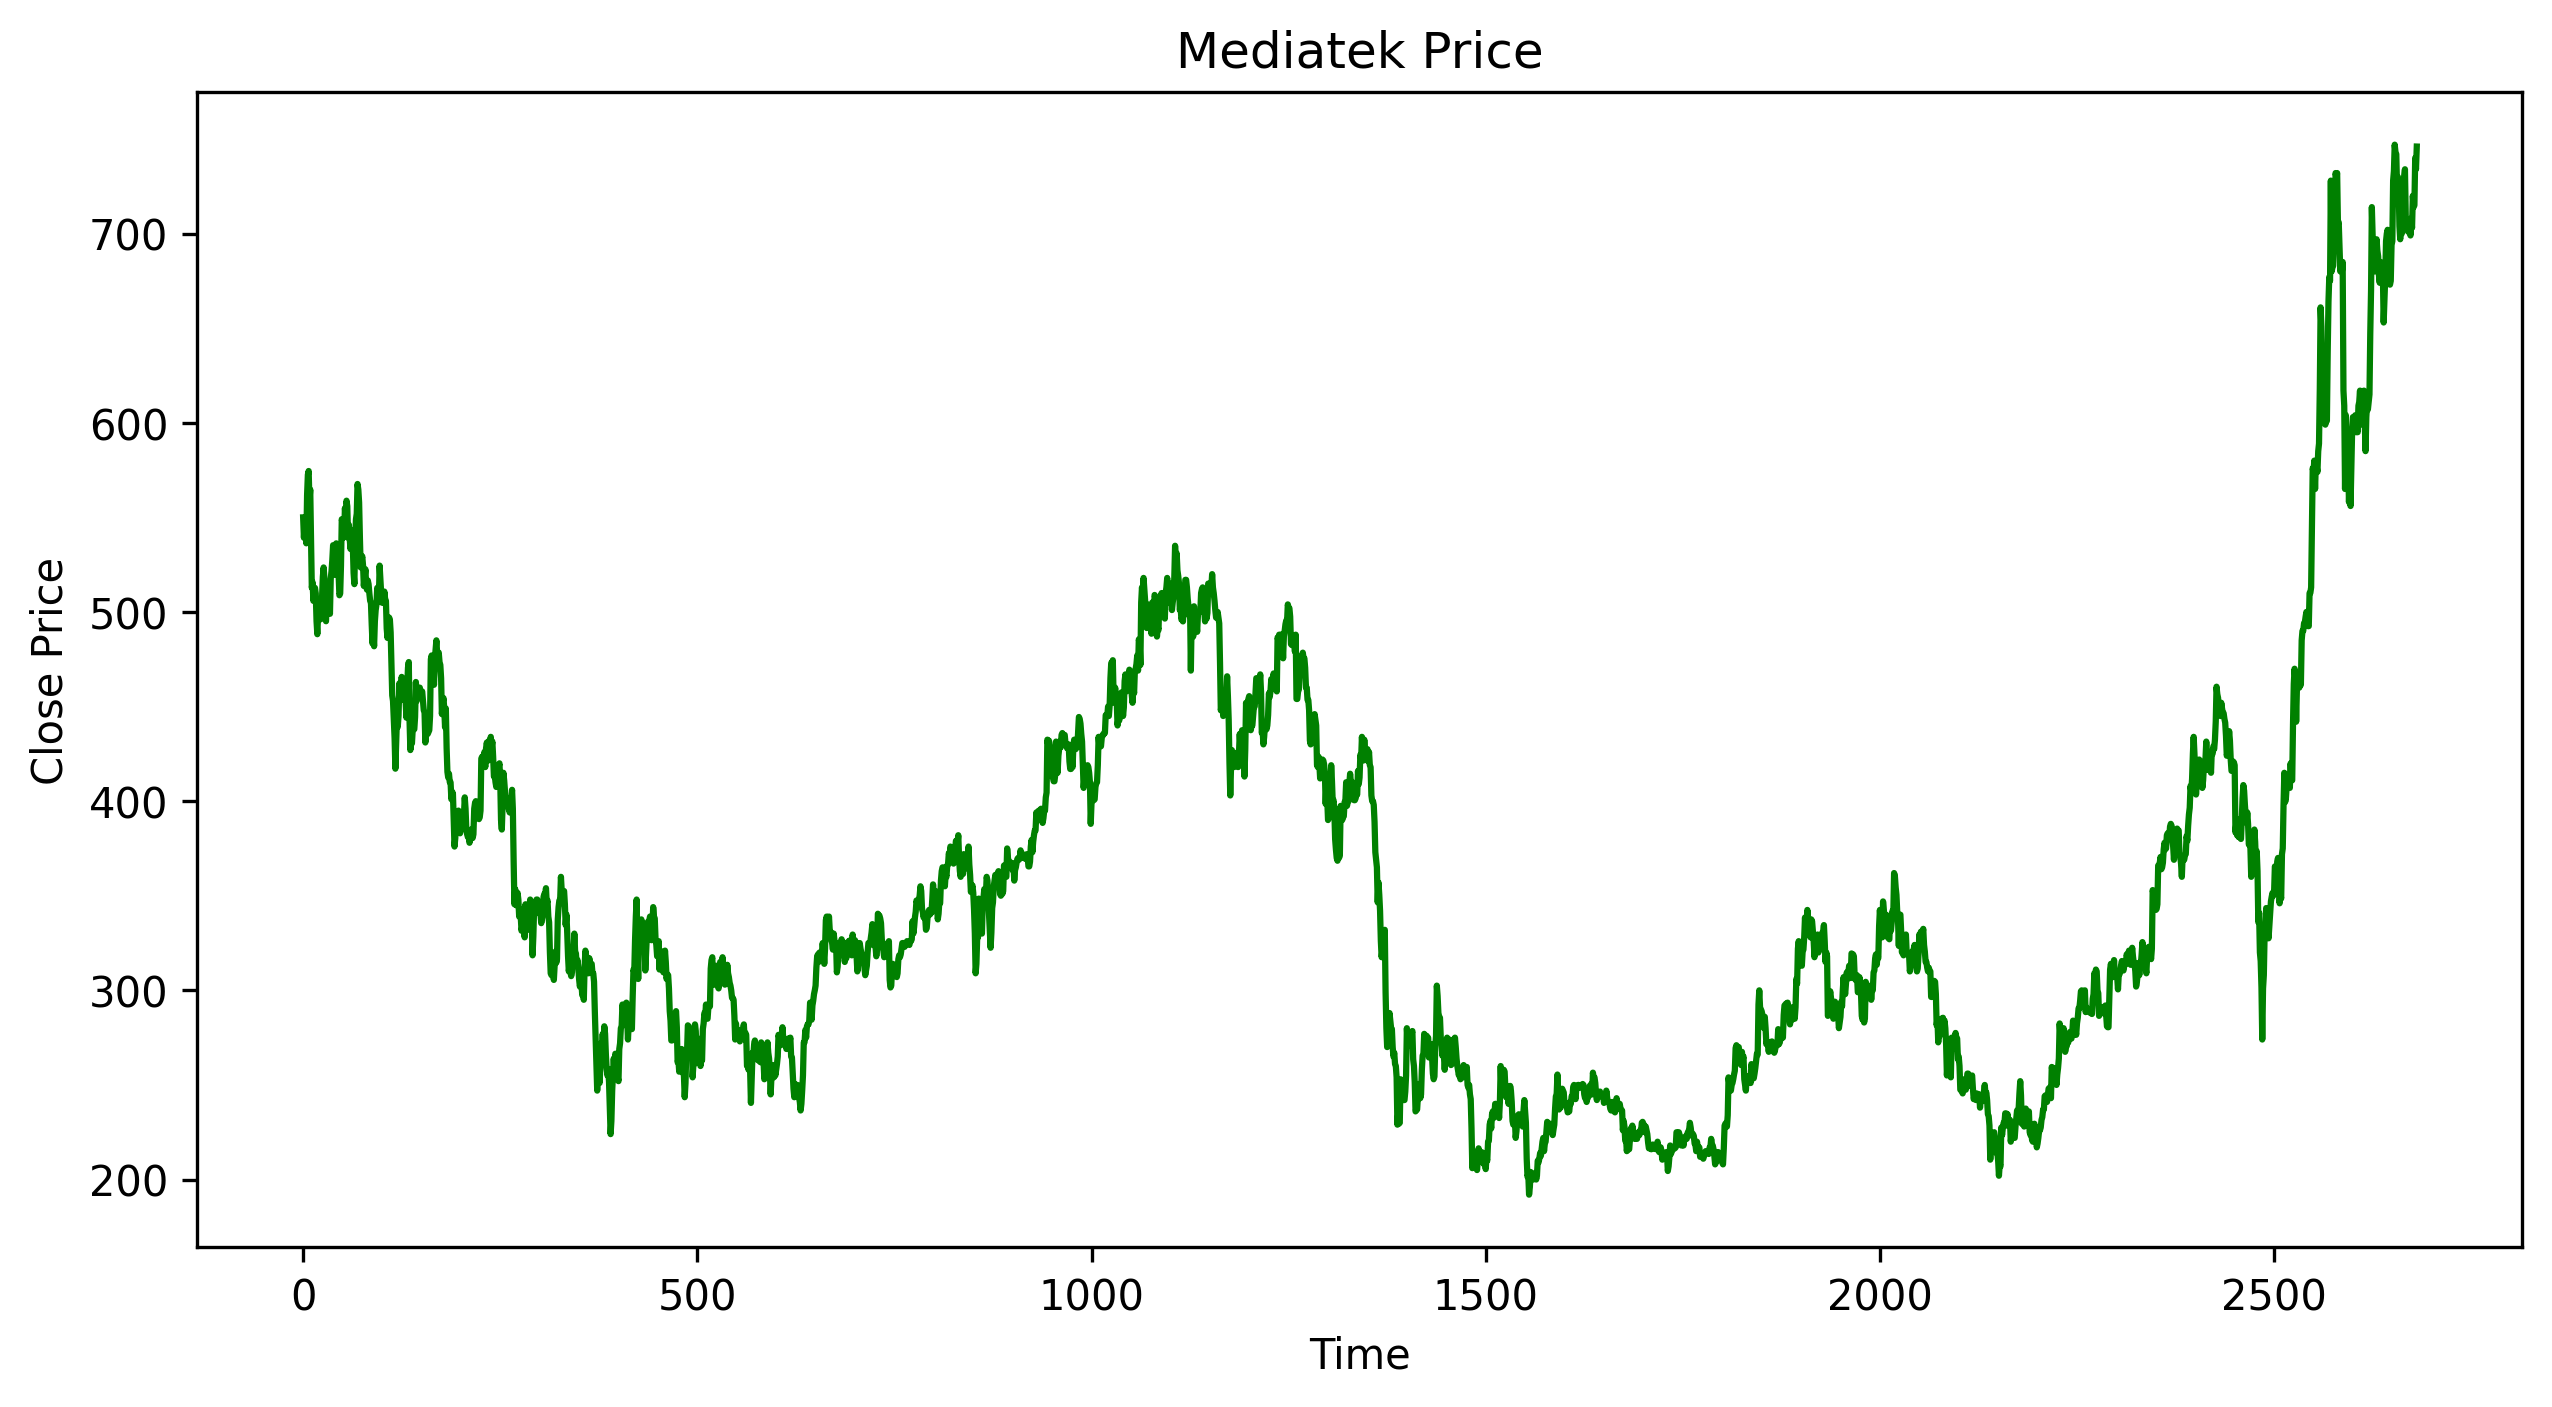

In [5]:
data=data['Close']
plt.figure(figsize=(10,5),dpi=300)
plt.plot(data, color ='green');
plt.ylabel('Close Price')
plt.title('Mediatek Price')
plt.xlabel('Time')
plt.show()

In [6]:
data

0       550.000000
1       539.215698
2       547.058838
3       547.058838
4       536.274536
           ...    
2677    714.000000
2678    715.000000
2679    740.000000
2680    734.000000
2681    746.000000
Name: Close, Length: 2682, dtype: float64

In [7]:

split =int(0.8*data.shape[0])
Train,Test  = data[0:split] , data[split:]

val_split=1341
Train,Val=Train[0:val_split] , Train[val_split:1341+447]
Val=Val.reset_index(drop=True)
Test=Test.reset_index(drop=True)

Train

0       550.000000
1       539.215698
2       547.058838
3       547.058838
4       536.274536
           ...    
1336    403.500000
1337    403.500000
1338    416.000000
1339    409.000000
1340    412.500000
Name: Close, Length: 1341, dtype: float64

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
#需將資料做reshape的動作，使其shape為(資料長度,1)
train_set= Train.values.reshape(-1,1)
training_set_scaled = sc.fit_transform(train_set)
val_set= Val.values.reshape(-1,1)
val_set_scaled = sc.transform(val_set)
test_set = Test.values.reshape(-1,1)
test_set_scaled = sc.transform(test_set)

X_train = []
y_train = []
for i in range(5,len(train_set)):
    X_train.append(training_set_scaled[i-5:i])
    y_train.append(training_set_scaled[i])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

X_val = []
y_val = []
for i in range(5,len(val_set)):
    X_val.append(val_set_scaled[i-5:i])
    y_val.append(val_set_scaled[i])
X_val, y_val = np.array(X_val), np.array(y_val)
X_val = np.reshape(X_val,(X_val.shape[0], X_val.shape[1], 1))

X_test = []
y_test = []
for i in range(5,len(test_set)):
    X_test.append(test_set_scaled[i-5:i])
    y_test.append(test_set_scaled[i])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_train[0]

array([[0.93007378],
       [0.89930631],
       [0.92168268],
       [0.92168268],
       [0.89091521]])

# Fit & compile the model

grid_search:

In [ ]:
param_grid = {
    'batch_size':[32,64],
    'epochs':[20,30],
    'learnig_rate':[0.001,0.0009,0.0008,0.0007,0.0006,0.0005,0.0004,0.0003,0.0002,0.0001],
    'units':[32,64,128]

}

In [ ]:
def create_model(learnig_rate = 0.001,neurons = 16, units=32 ):
  model = keras.models.Sequential([
    LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=units),
    Dropout(0.2),
    Dense(1)
  ])
  opt=Adam(learning_rate=learnig_rate,beta_1=0.95)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model)

In [ ]:
# 使用 Grid Search 尋找最佳模型
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train, y_train)

# 印出最佳模型的參數和評分
print('最佳參數:', grid_result.best_params_)
print('最佳評分:', -grid_result.best_score_)

In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"負MSE評分: {mean}, 標準差: {stdev}, 參數組合: {param}")

原始model:

In [ ]:
keras.backend.clear_session()
model = keras.models.Sequential([
    GRU(32, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
opt=Adam(learning_rate=0.001,beta_1=0.95)
model.compile(optimizer=opt, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                3360      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32,validation_data=(X_val,y_val))

Epoch 1/100
42/42 [==============================] - 4s 21ms/step - loss: 0.0666 - val_loss: 0.0711
Epoch 2/100
42/42 [==============================] - 0s 8ms/step - loss: 0.0115 - val_loss: 0.0183
Epoch 3/100
42/42 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0086
Epoch 4/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 9.8690e-04 - val_loss: 8.6527e-04
Epoch 6/100
42/42 [==============================] - 0s 6ms/step - loss: 9.2419e-04 - val_loss: 7.4249e-04
Epoch 7/100
42/42 [==============================] - 0s 5ms/step - loss: 9.1542e-04 - val_loss: 8.7545e-04
Epoch 8/100
42/42 [==============================] - 0s 5ms/step - loss: 9.1482e-04 - val_loss: 8.3310e-04
Epoch 9/100
42/42 [==============================] - 0s 6ms/step - loss: 9.0658e-04 - val_loss: 8.5700e-04
Epoch 10/100
42/42 [==============================] - 0s 6ms/step - 

In [ ]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'val_loss'])

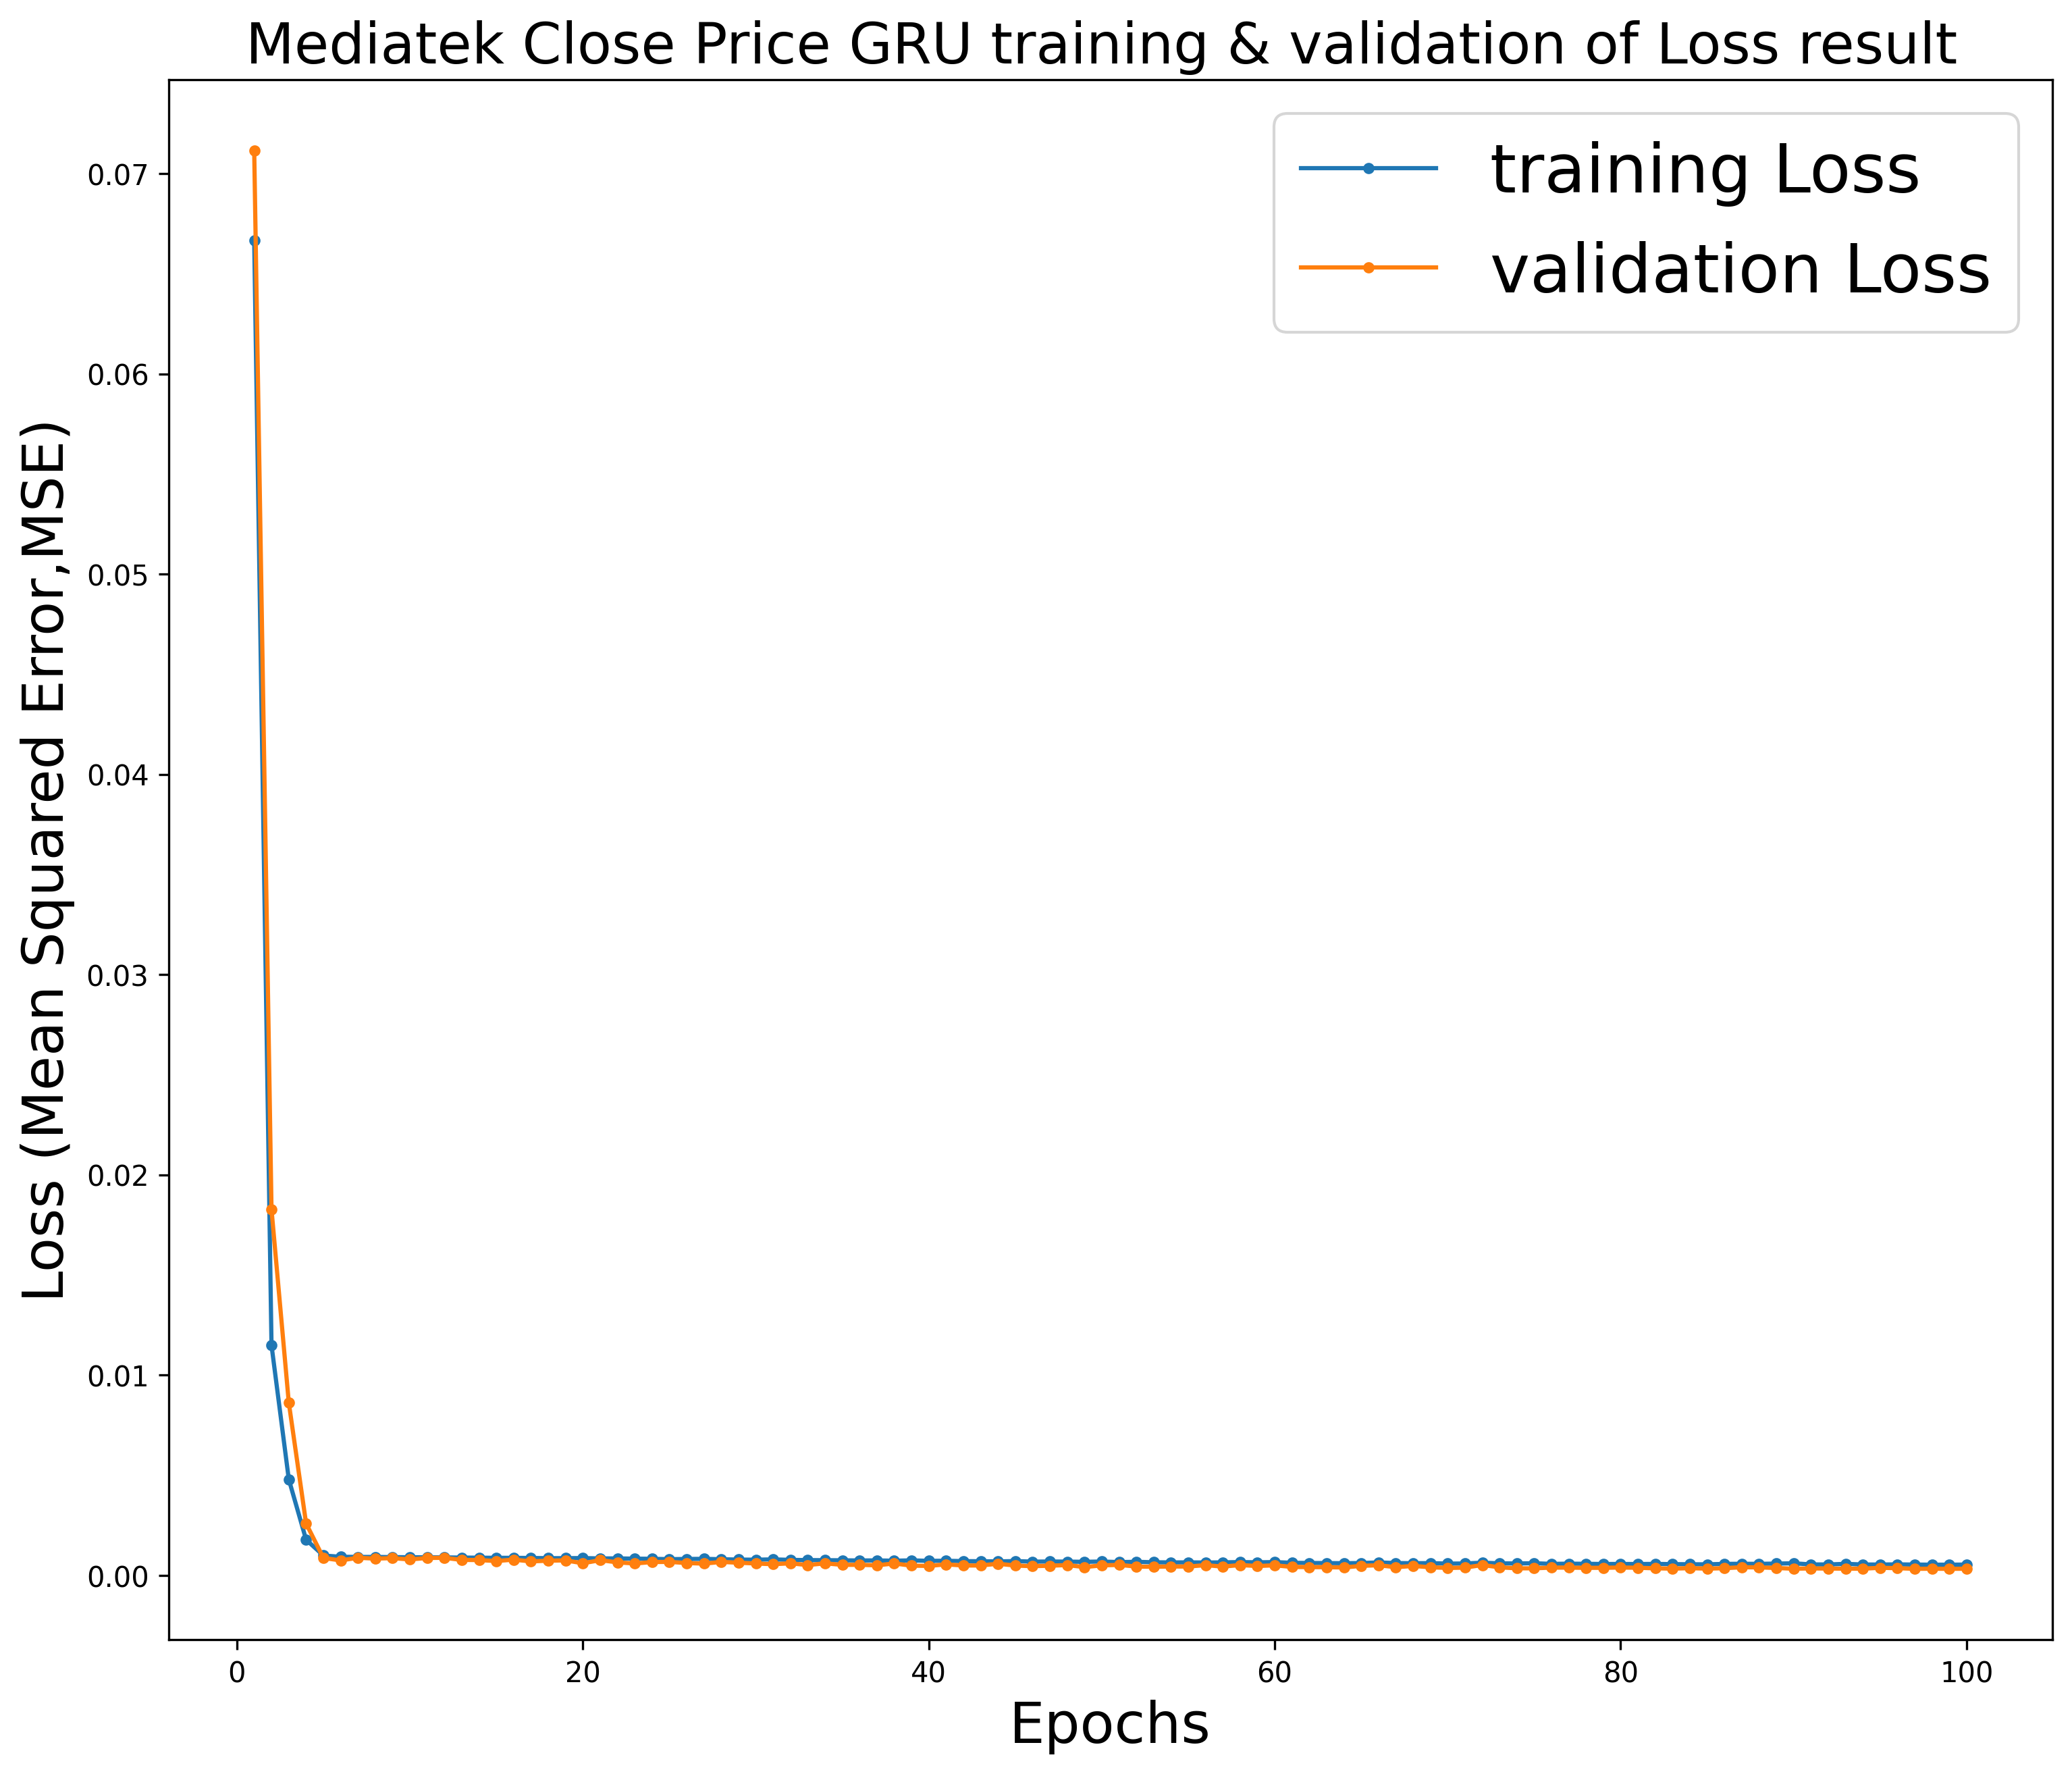

In [ ]:
#Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Mean Squared Error,MSE)',fontsize=20)
plt.title('Mediatek Close Price GRU training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

# Testing

In [ ]:

predicted_price = model.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_price = sc.inverse_transform(predicted_price)
actual_price = sc.inverse_transform(y_test)

17/17 [==============================] - 0s 2ms/step


In [ ]:
df1 = pd.DataFrame(predicted_price)
df2 = pd.DataFrame(actual_price)

df1.columns = ['Pred']
df2.columns = ['Actual']

merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv('output.csv', index=False)

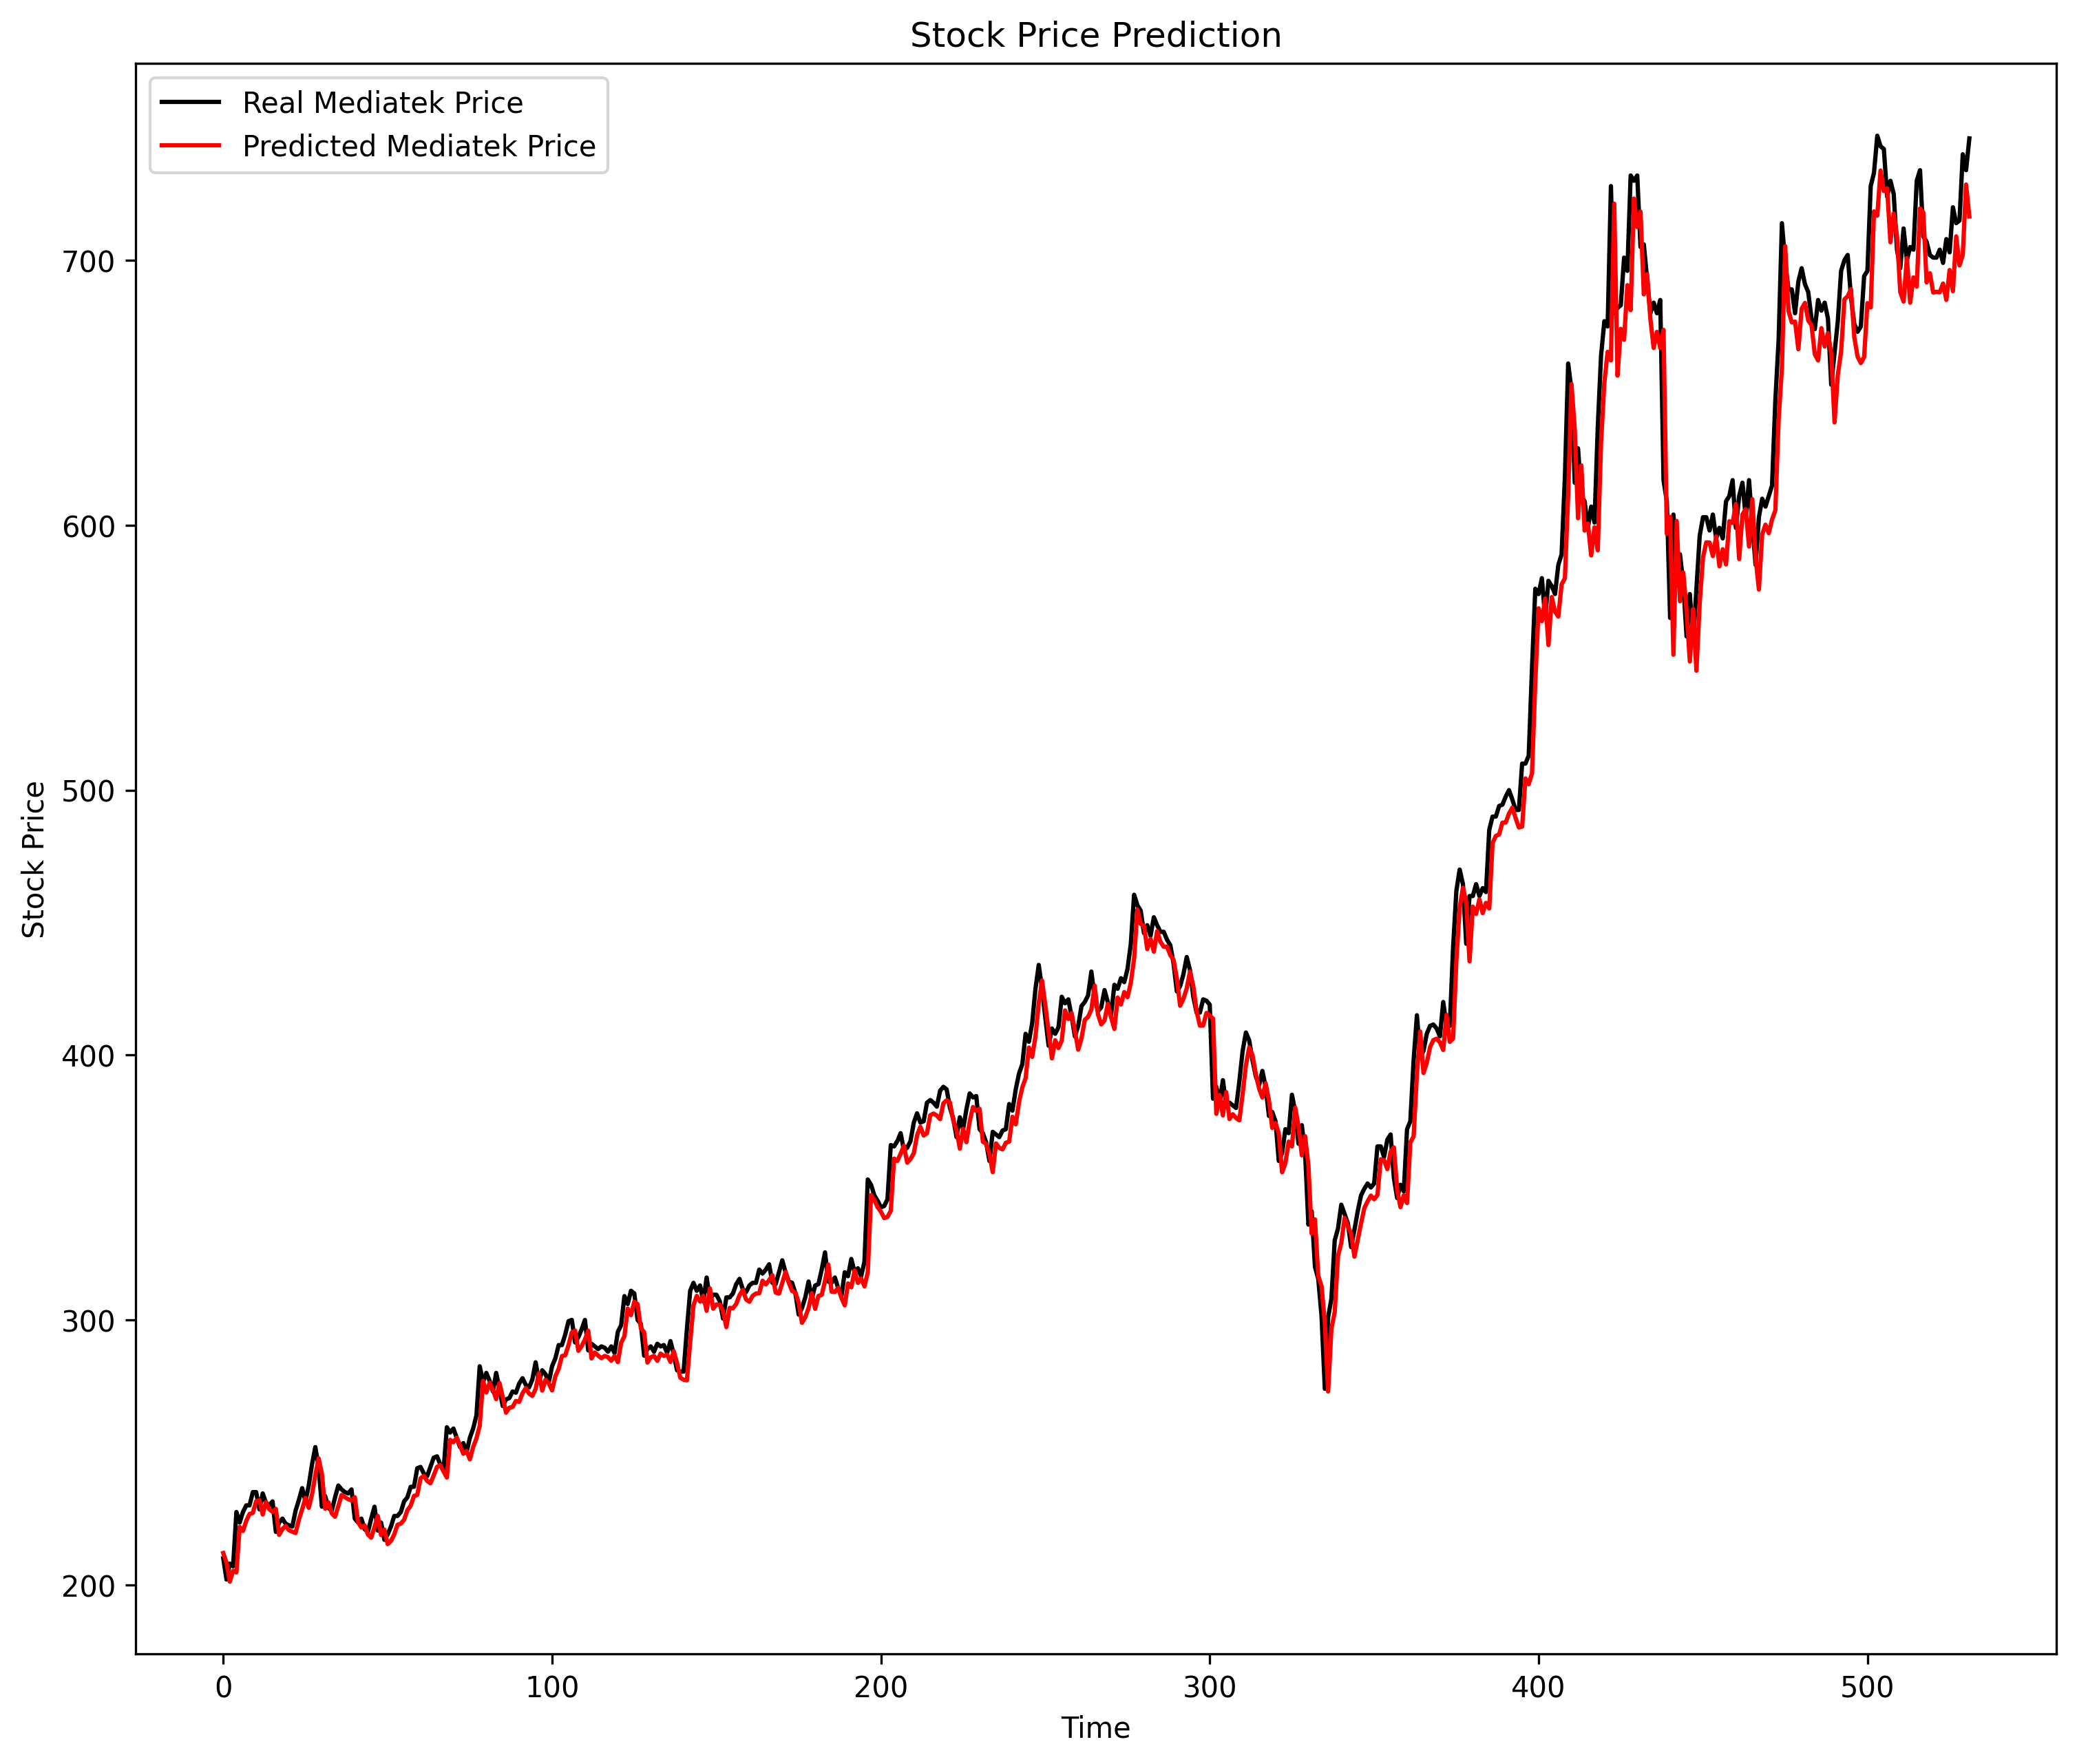

In [ ]:
plt.figure(figsize=(12,10),dpi=300)
plt.plot(actual_price, color = 'black', label = 'Real Mediatek Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Mediatek Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Improve the model

## Build model & Compile & Fit

In [ ]:
keras.backend.clear_session()
model = Sequential()
model.add(LSTM(units = 64,return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 32,activation='relu'))
model.add(Dense(units = 1))
model.summary()
opt=Adam(learning_rate=0.002,beta_1=0.95)
model.compile(optimizer = opt, loss = 'mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             16896     
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


## Plot the history of training and validation

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32,validation_data=(X_val,y_val))

Epoch 1/100
42/42 [==============================] - 6s 30ms/step - loss: 0.0392 - val_loss: 0.0247
Epoch 2/100
42/42 [==============================] - 1s 16ms/step - loss: 0.0063 - val_loss: 0.0019
Epoch 3/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 4/100
42/42 [==============================] - 1s 17ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 5/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 6/100
42/42 [==============================] - 1s 17ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 7/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 8/100
42/42 [==============================] - 1s 17ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 9/100
42/42 [==============================] - 1s 17ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 10/100
42/42 [==============================] - 1s 16ms/step - loss: 0.0016 - val_loss: 0.0022

In [ ]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'val_loss'])

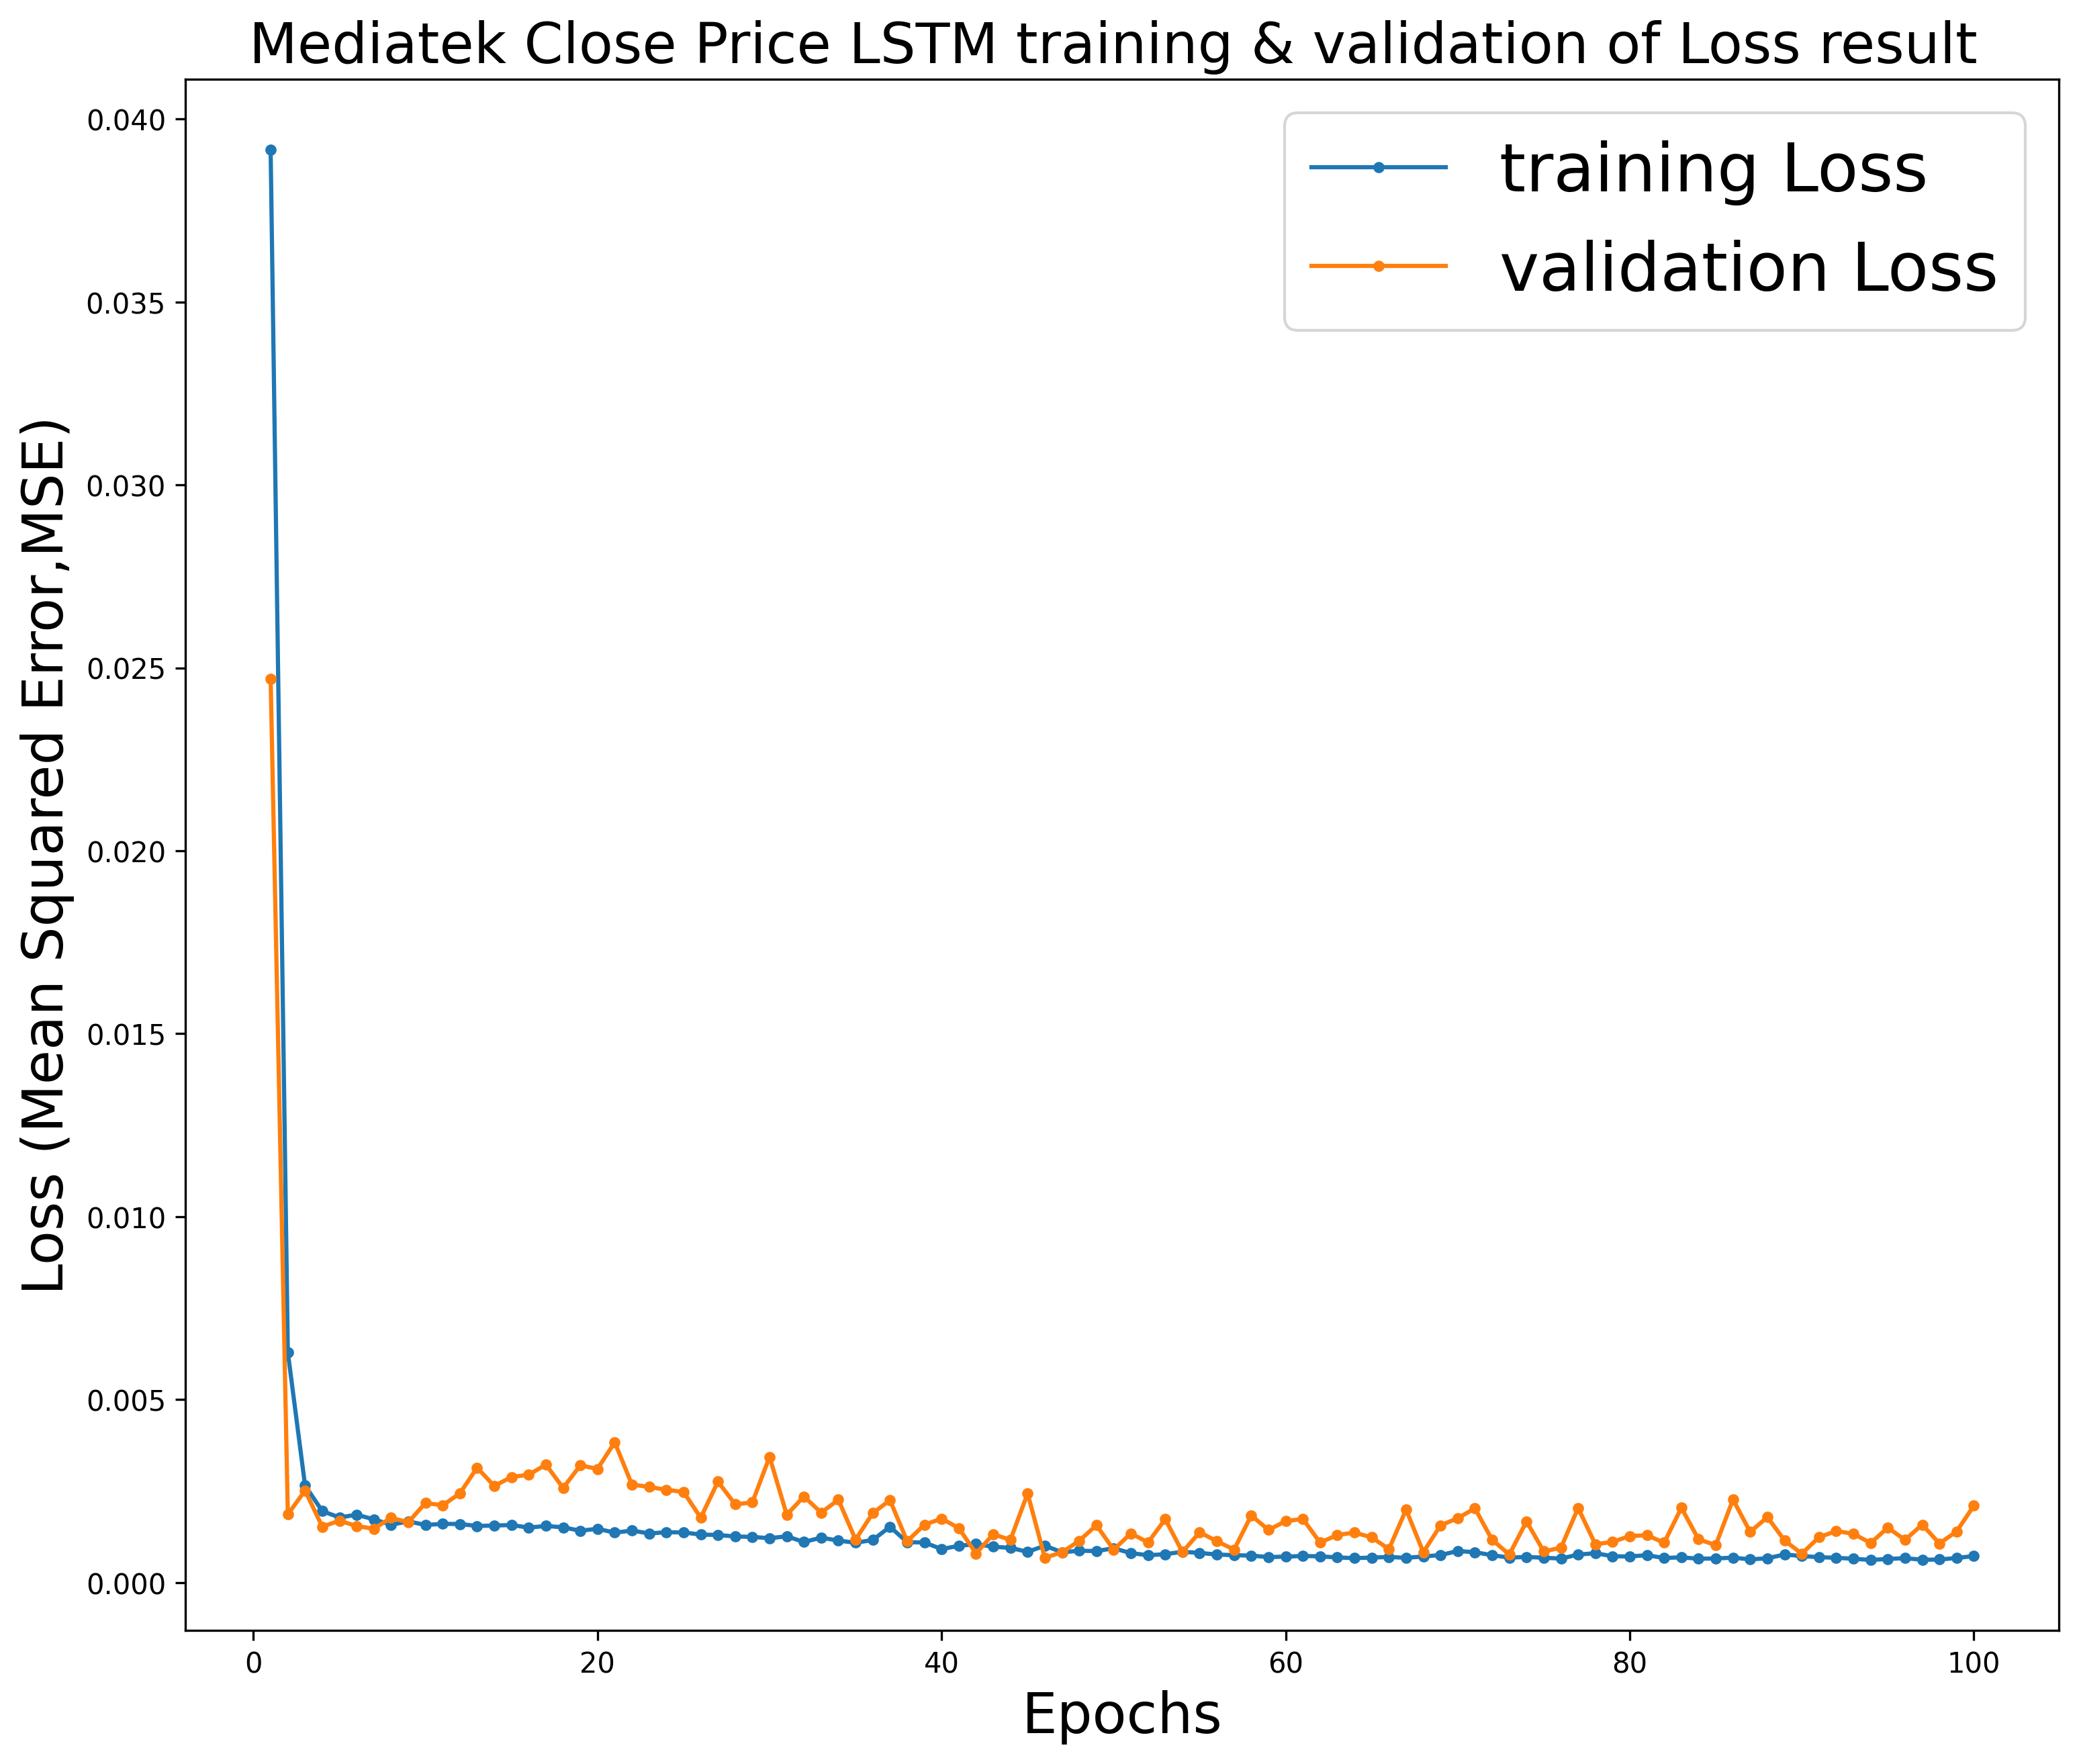

In [ ]:
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Mean Squared Error,MSE)',fontsize=20)
plt.title('Mediatek Close Price LSTM training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [ ]:
predicted_price = model.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_price = sc.inverse_transform(predicted_price)
actual_price = sc.inverse_transform(y_test)

17/17 [==============================] - 0s 3ms/step


In [ ]:
df1 = pd.DataFrame(predicted_price)
df2 = pd.DataFrame(actual_price)

df1.columns = ['Pred']
df2.columns = ['Actual']

merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv('output2.csv', index=False)

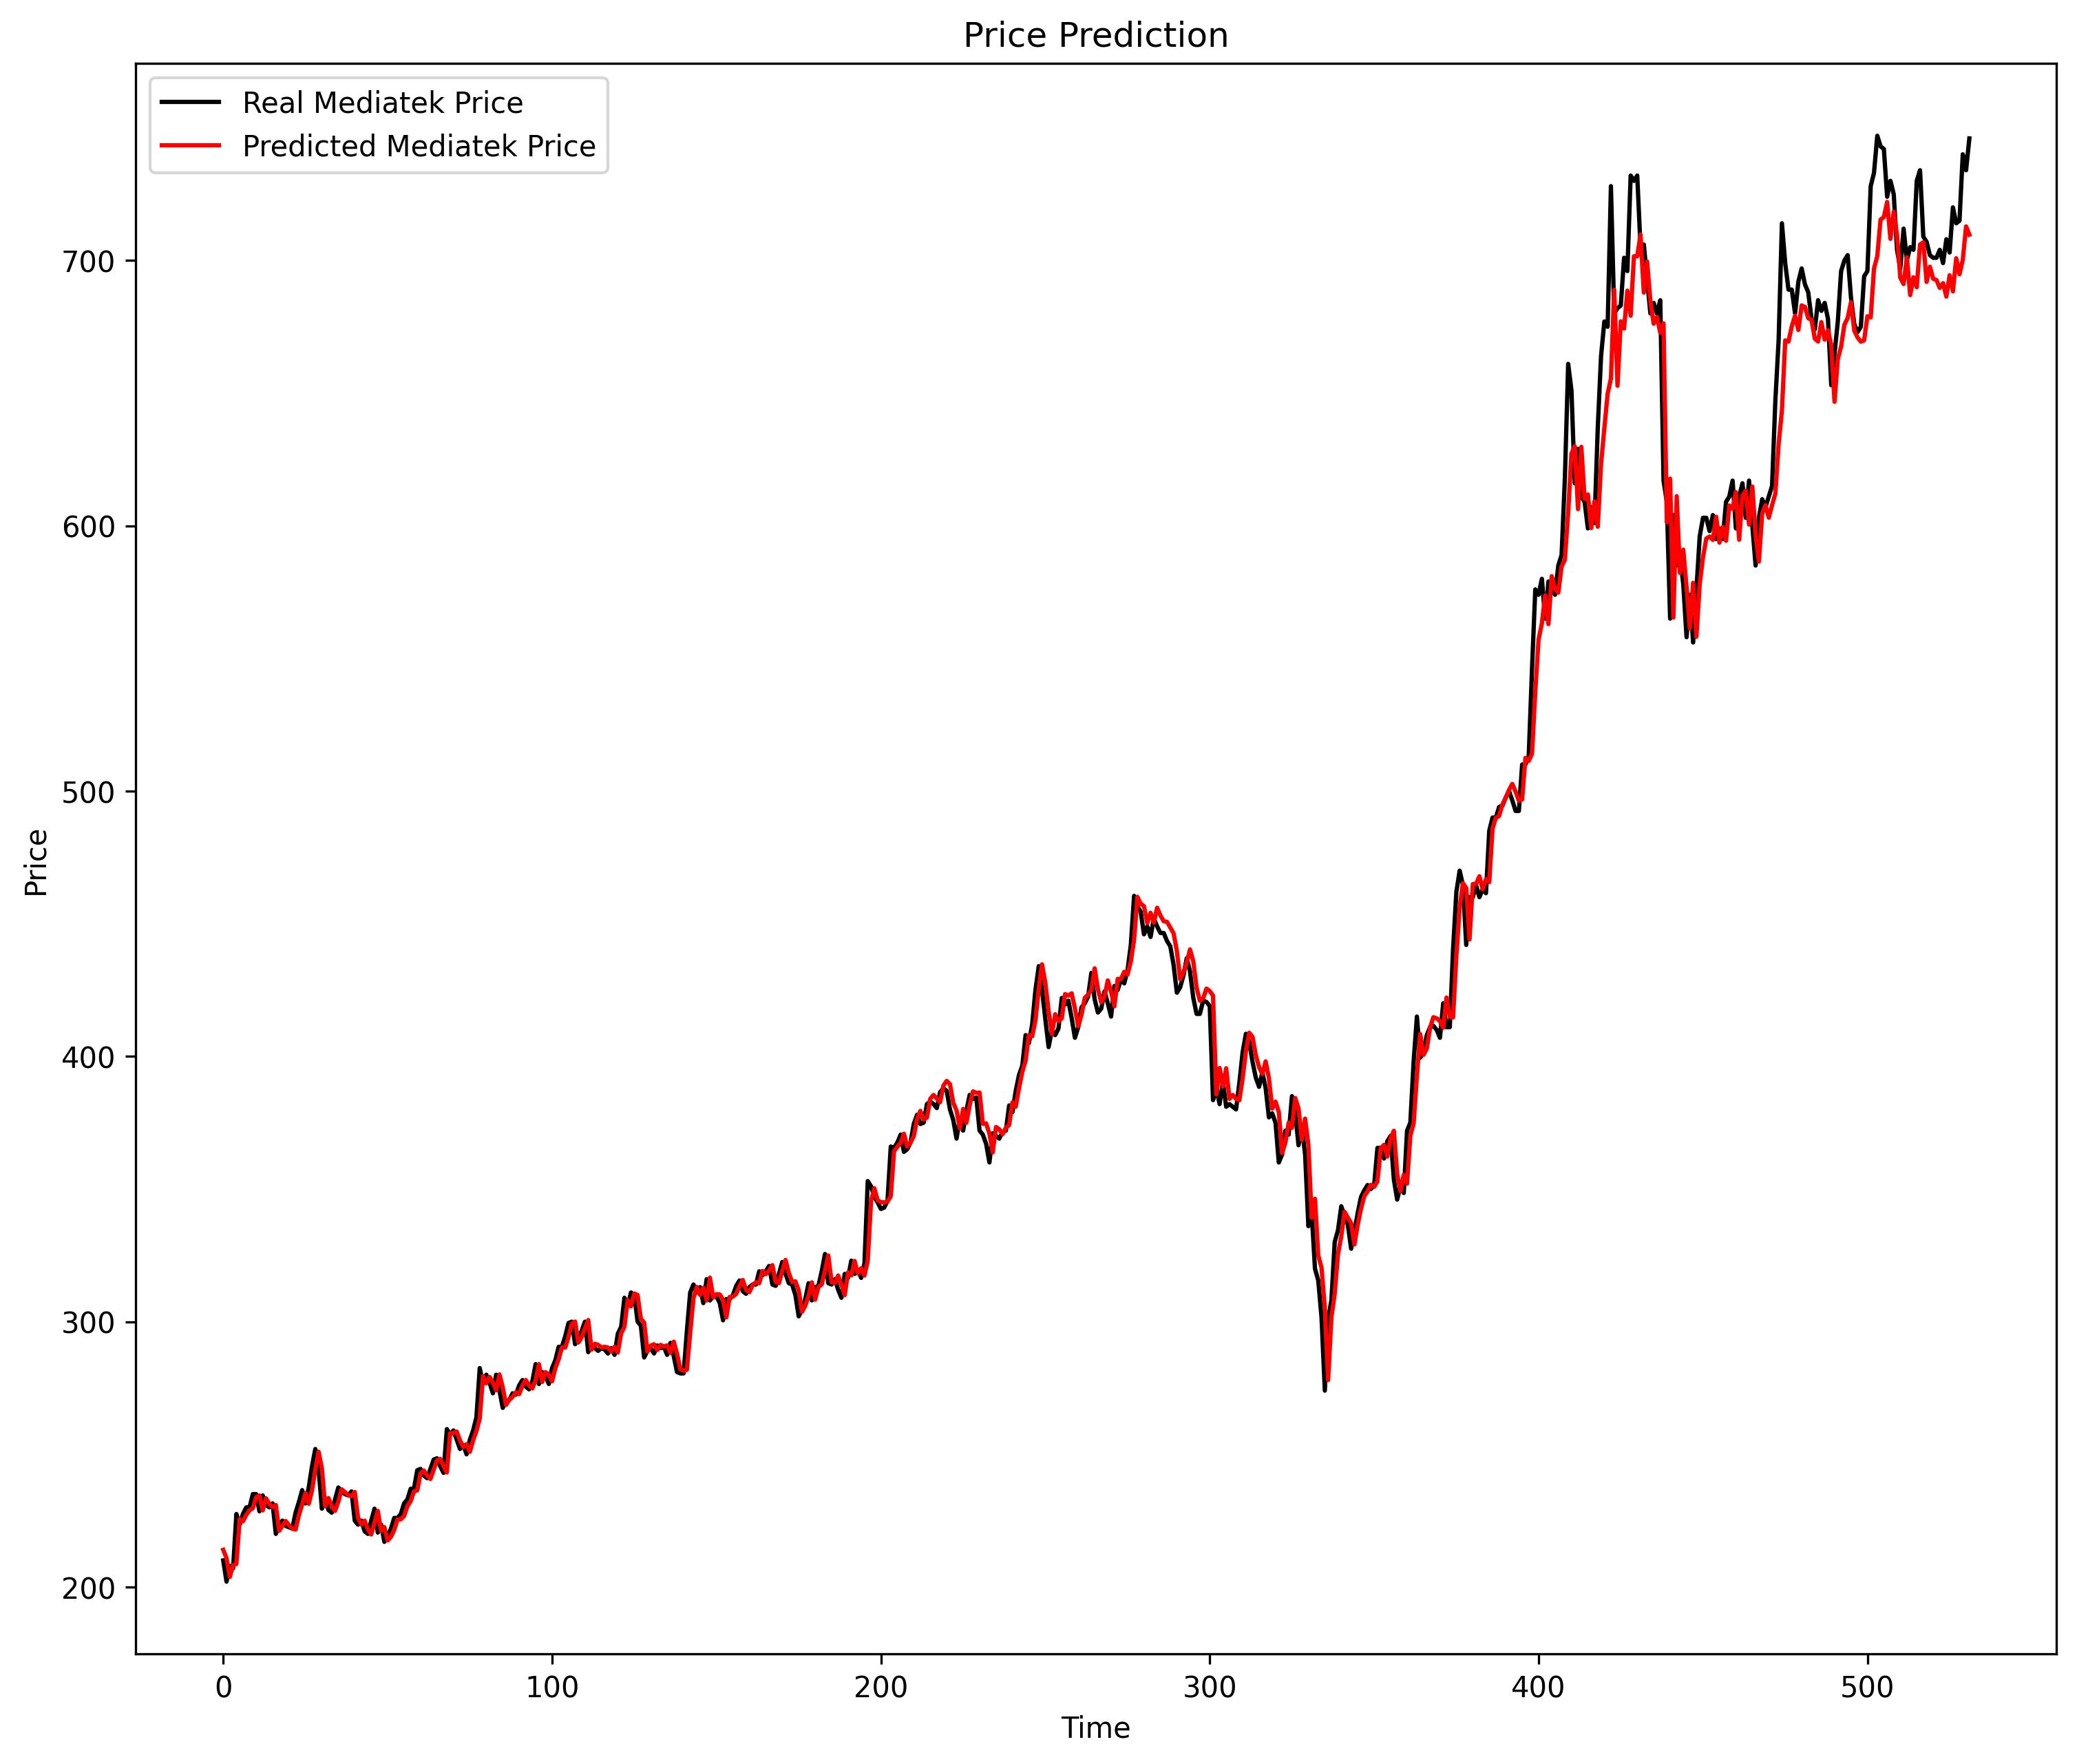

In [ ]:
plt.figure(figsize=(12,10),dpi=300)
plt.plot(actual_price, color = 'black', label = 'Real Mediatek Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Mediatek Price')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE

# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator

    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [ ]:
predicted_price
actual_price

MAE=mean_absolute_error(actual_price,predicted_price)
MSE=mean_squared_error(actual_price,predicted_price,squared=True)
RMSE=mean_squared_error(actual_price,predicted_price,squared=False)
MAPE=mean_absolute_percentage_error(actual_price,predicted_price)
SMAPE=SMAPE_calulate(actual_price,predicted_price)
RAE=RAE_calculate(actual_price,predicted_price)
MRAE=MRAE_calculate(actual_price,predicted_price)
MdRAE=MdRAE_calculate(actual_price,predicted_price)
RSE=RSE_calculate(actual_price,predicted_price,Root=False)
RRSE=RSE_calculate(actual_price,predicted_price,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 8.647
MSE: 180.307
RMSE: 13.428
MAPE: 1.924 %
SMAPE: 1.932 %
RAE: 0.067
MRAE: 0.00012604545057251187
MdRAE: 0.052 bench: 417.907
RSE: 0.007
RRSE: 0.086


# 多變量使用的方法 把切好的原始資料套用方法

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)